In [1]:
import pandas as pd
import numpy as np
import time
from zipfile import ZipFile
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pptx import Presentation
from xlsxwriter.utility import xl_rowcol_to_cell
from pretty_html_table import build_table
from datetime import date,datetime,timedelta
from babel.numbers import format_currency
from IPython.core.display import HTML
from pyxlsb import open_workbook
from zipfile import ZipFile
import shutil
import os
import glob

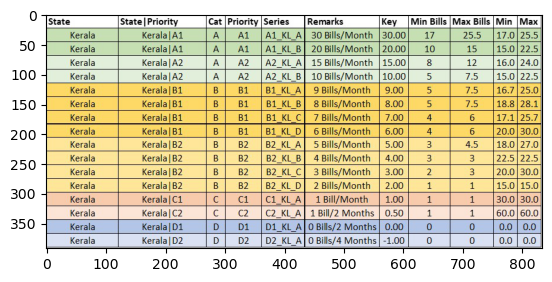

In [2]:
def display_image_1(image_path_1):
    img = mpimg.imread(image_path_1)
    plt.imshow(img)
    plt.axis('on')  
    plt.show()
image_path_1 = "D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\KL.jpg"
display_image_1(image_path_1)

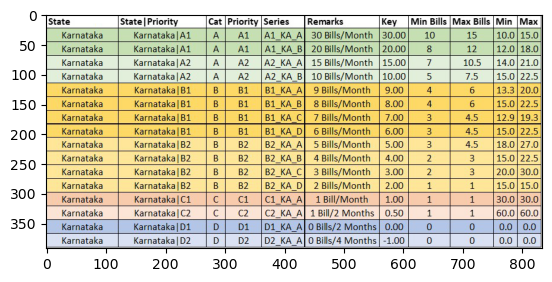

In [3]:
def display_image_2(image_path_2):
    img = mpimg.imread(image_path_2)
    plt.imshow(img)
    plt.axis('on')  
    plt.show()
image_path_2 = "D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\KA.jpg"
display_image_1(image_path_2)

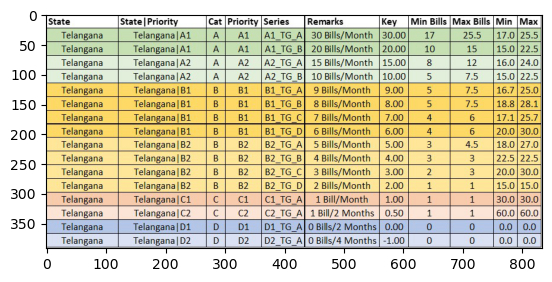

In [4]:
def display_image_3(image_path_3):
    img = mpimg.imread(image_path_3)
    plt.imshow(img)
    plt.axis('on')  
    plt.show()
image_path_3 = "D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\TG.jpg"
display_image_1(image_path_3)

##### All_Master

In [5]:
master_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Aster Pharmacy Raw data\Masters\\"

In [6]:
master_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Aster Pharmacy Raw data\\Masters\\'

In [7]:
gof_pro=pd.read_csv(master_path+'Gof Pro master.csv'
                       ,skiprows = 3,low_memory=False)
gof_pro.drop(gof_pro.index[0],inplace=True)
dyn_pro1=pd.read_csv(master_path+'D365 pro Master 1.csv',low_memory=False)
dyn_pro2=pd.read_csv(master_path+'D365 pro Master 2.csv',low_memory=False)
uni_pro=pd.read_csv(master_path+'Item Unique master.csv',low_memory=False)
mdm_master=pd.read_csv(master_path+'One_MDM_Master.csv',low_memory=False)
stores=pd.read_csv(master_path+'Store Details.csv',low_memory=False)

In [8]:
dyn_pro=pd.concat([dyn_pro1,dyn_pro2])
dyn_pro.reset_index(inplace=True)
dyn_pro.drop("index",axis=1,inplace=True)

In [9]:
dyn_pro.columns

Index(['Item number', 'Product name', 'Search name', 'Item Reference',
       'Composition', 'Product type', 'Product subtype',
       'Product dimension groups', 'Product lifecycle state', 'Chronic Drug',
       'Is generic', 'Manufacturer', 'Mfg Code', 'Marketed By',
       'Is Prescription Required', 'Product Form', 'Schedule Type', 'BOM unit',
       'Dual Use Code', 'Item type', 'Packing group', 'Packing quantity',
       'Production group', 'Production type', 'Search name2', 'Tax rate type',
       'Vendor', 'Modified by', 'Unit', 'Created by', 'Item group',
       'Item model group', 'Created date and time', 'HSN codes', 'MDM Clean 1',
       'IS Purchasse (B)', 'One MDM Code', 'MDM Chcek ', 'Is Sale Blocked',
       'Created Date', 'CHAR =10', 'Mfg Code2'],
      dtype='object')

In [10]:
sd_track=stores.drop(stores[stores['Store Type']!='Retail'].index)

In [11]:
sd_track['D 365 Store Id']=sd_track['D 365 Store Id'].astype('int64')

In [12]:
uni_pro.rename(columns={'GOF CODE':"Item Code",'MDM Code':"One MDM Code",'Updated Pro Name':"Brand Description"},inplace=True)
uni_pro.columns

Index(['Gof Code', 'Gof Description', 'MDM Code OLD', 'MDM Code Revised',
       'Easy Sol Code', 'Easy Sol Desc', '365 Item code', 'D365 Descxription',
       'IU', 'Choose Tax %', 'Sales Blocked', 'Updated Item Name',
       'Special Form', 'Generic Name', 'Strength', 'Form', 'Category 1',
       'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6 - Brand', 'HSN Codes', 'Long Description', 'Item Code',
       'One MDM Code', 'Gofcode', 'Easysol', 'D365 Cpde', 'Created Date',
       'Created By', 'CTG', 'KOM', 'CTG 8', 'Brand Description', 'Sch CTG',
       'MDM Rework', 'Medplus Code', 'Act Audit Form', 'Form Name'],
      dtype='object')

In [13]:
mdm_master.rename(columns={'MDM Code':"One MDM Code",'Item Description':"Brand Description"},inplace=True)
mdm_master.columns

Index(['System', 'One MDM Code', 'D 365 Code', 'GOF Code', 'Item Group', 'CTG',
       'KOM-D', 'KOM', 'CAT', 'CTG 8', 'IU', 'Item Per Unit',
       'Brand Description', 'IS Pur Blocked', 'Composition'],
      dtype='object')

In [14]:
sd_track.rename(columns={'Store Mapping As Per grofula':"Outlet Name"},inplace=True)
sd_track.columns

Index(['S. No.', 'Store Code', 'Store Type', 'HDH Store Code', 'HPD BU2 ID',
       'HPD TNG', 'Get Well', 'SreeJi', 'Vasu agency', 'Venkat Sai',
       'HPD Kerala', 'PO Store Name', 'Store NameAs per Branding ',
       'Outlet Name', 'GOF Store Id', 'Launch Date', 'Email ID', 'Short Name',
       'Build-up Area in Sft', 'Phone Number', 'Ops Exexutive',
       'Cluster Mail Id', 'Executive Phone Number', 'Area Manager',
       'Sub Region', 'State', 'City', 'City 2', 'Status', 'Manager', 'Cluster',
       'Any Desk ID', 'Rental', 'FF Target', 'Address', 'Zip Code', 'Region',
       'HOO', 'Outlet Format', 'Tenure Days', 'Tenure Month', 'Tenure Years',
       'Tenure', 'Launch Month', 'Launch Year', 'Quarter', 'Financial Year',
       'Securty Deposit', 'Rent Start Date', 'Store System', 'D 365 Store Id',
       'Store Name As per D 365', 'Retail Channel Id', 'Party ID',
       'Fin And Qtr', 'Location Series', 'City G', 'Vendor Code',
       'Area Manger Maild ', 'Manager Mail Id'],
 

In [15]:
sales_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data"

###### HPD Rate List

In [16]:
hps_rate_list_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\ES Sale RD\HPD Rate List"

In [17]:
hps_rate_list_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List'

In [18]:
hps_rate_files = glob.glob(hps_rate_list_path + "/*.csv")

hpd_rate_master = pd.DataFrame()
hpd_rate_content = []

for filename in hps_rate_files:
    dat,c = filename.split(" ")[-2].split("\\")
    df = pd.read_csv(filename, index_col=None, low_memory=False).assign(State=c)
    hpd_rate_content.append(df)

# Concatenate the dataframes in dyn_content
hpd_rate_master = pd.concat(hpd_rate_content)

In [19]:
hpd_rate_master.head(1)

,S.No,Unnamed: 1,Unnamed: 2,COMPANY,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State
0,1,82504,-1,NaN,966737,FEVERIN CC TABLET,10S,12.0,0.0,0.0,0.0,0.0,PHARMA,3-A-AR78-HW-BQ56-XX09-X-00001,KA


In [20]:
hpd_rate_master.reset_index(inplace=True)
hpd_rate_master.drop("index",axis=1,inplace=True)
print(hpd_rate_master.shape)
hpd_rate_master.tail(2)

(253146, 15)


,S.No,Unnamed: 1,Unnamed: 2,COMPANY,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State
253144,84401,41137,2470,ZYPHARS PHARMACEUTICALS PVT LTD,936216,VAZIR 500MG TABLET 3S,3S,12.0,0.0,0.0,0.0,0.0,PHARMA,3-A-AJ61-HW-GK61-BS10-X-00001,TG
253145,84402,86789,4923,ZYQON LIFESCIENCES PRIVATE LIMITED,990566,DZYLIN TABLET 10S,10S,18.0,0.0,0.0,0.0,0.0,PHARMA,3-A-BP36-HW-JL86-XX09-X-00001,TG


In [21]:
hps_rate_files

['D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\KA Ratelist.csv',
 'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\KL Ratelist.csv',
 'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\TG Ratelist.csv']

In [22]:
hpd_rate_master.drop(columns=['S.No', 'Unnamed: 1', 'Unnamed: 2', 'COMPANY'],inplace=True)

In [23]:
hpd_rate_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253146 entries, 0 to 253145
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Code       253146 non-null  object 
 1   Item Name  253146 non-null  object 
 2   PACK       252900 non-null  object 
 3   GST        253146 non-null  float64
 4   S.RATE     253146 non-null  float64
 5   MRP        253146 non-null  float64
 6   Cost       253146 non-null  float64
 7   P.RATE     253146 non-null  float64
 8   ITEMCAT    253146 non-null  object 
 9   ONEMGCODE  253146 non-null  object 
 10  State      253146 non-null  object 
dtypes: float64(5), object(6)
memory usage: 21.2+ MB


In [24]:
#hpd_rate_master["Logic Drop"]=hpd_rate_master['S.RATE']+hpd_rate_master["MRP"]+hpd_rate_master["Cost"]+hpd_rate_master["P.RATE"]

In [25]:
hpd_rate_master["ARPL CP(AppX)"]=hpd_rate_master['S.RATE']

In [26]:
hpd_rate_master["ARPL CP(AppX)"] = hpd_rate_master.apply(
    lambda row: row["Cost"] if row["ARPL CP(AppX)"] == 0 else row["ARPL CP(AppX)"],
    axis=1
)

In [27]:
rate_master=hpd_rate_master.drop(hpd_rate_master[hpd_rate_master["ARPL CP(AppX)"]==0].index)

In [28]:
rate_master.reset_index(inplace=True)
rate_master.drop("index",axis=1,inplace=True)
print(rate_master.shape)
rate_master.tail(1)

(59393, 12)


,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State,ARPL CP(AppX)
59392,537723,SUGAR FREE NATURA POWDER 100GM,EA 0,12.0,117.26,150.0,113.84,113.84,FMCG,3-I-D-A1AU-XX09-XX09-01152,TG,117.26


In [29]:
rate_master["ARPL CP Max"]=rate_master["ARPL CP(AppX)"]
rate_master["ARPL CP Min"]=rate_master["ARPL CP(AppX)"]

In [30]:
"""rate_master.to_excel("excel.xlsx")"""

'rate_master.to_excel("excel.xlsx")'

In [31]:
rate_master[rate_master["ONEMGCODE"]=="3-A-BS20-HW-BF13-BN42-X-00012"]

,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State,ARPL CP(AppX),ARPL CP Max,ARPL CP Min
3713,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,20.72,143.56,17.72,18.65,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,KA,20.72,20.72,20.72
24400,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,19.35,130.51,18.96,19.35,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,KL,19.35,19.35,19.35
44532,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,24.20,143.56,22.00,22.00,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,TG,24.20,24.20,24.20


In [32]:
arpl_cp=rate_master.pivot_table(index=["ONEMGCODE"],values=["ARPL CP(AppX)","ARPL CP Min","ARPL CP Max"],aggfunc={"ARPL CP(AppX)":"mean","ARPL CP Min":"min","ARPL CP Max":"min"})

In [33]:
arpl_cp.reset_index(inplace=True)
arpl_cp.head()

,ONEMGCODE,ARPL CP Max,ARPL CP Min,ARPL CP(AppX)
0,3-A-AA16-HW-AG53-BD31-X-00001,9999.29,9999.29,9999.29
1,3-A-AA16-HW-FM28-BD31-X-00001,9285.71,9285.71,9285.71
2,3-A-AA16-HW-FM28-XX09-X-00001,9285.71,9285.71,9285.71
3,3-A-AA21-HW-DJ58-XX09-X-00012,160.00,160.00,160.00
4,3-A-AA22-HW-CD23-BJ51-X-00001,68.57,68.57,68.57


In [34]:
arpl_cp[arpl_cp["ONEMGCODE"]=="3-A-BS20-HW-BF13-BN42-X-00012"]

,ONEMGCODE,ARPL CP Max,ARPL CP Min,ARPL CP(AppX)
13377,3-A-BS20-HW-BF13-BN42-X-00012,19.35,19.35,21.423333


######  Dymanics Sales

In [35]:
sales_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data'

In [36]:
d365_sales_check=input()

In [37]:
ds_01=pd.read_csv(sales_path+'\D 365 Raw data\Sales Data\Dyn-S-09-2023.csv',low_memory=False)
ds_02=pd.read_csv(sales_path+'\D 365 Raw data\Sales Data\Dyn-S-10-2023.csv',low_memory=False)

In [38]:
ds_01['Quantity'] = ds_01['Quantity'].astype(str)
ds_02['Quantity'] = ds_02['Quantity'].astype(str)

In [39]:
print('01 :',ds_01['Quantity'].dtype,'',
      '02 :',ds_02['Quantity'].dtype)

01 : object  02 : object


In [40]:
print('01 :',ds_01.shape,'',
      '02 :',ds_02.shape)

01 : (405040, 54)  02 : (472380, 54)


In [41]:
dyn_sm=pd.concat([ds_01,ds_02])
dyn_sm.reset_index(inplace=True)
print(dyn_sm.shape)
dyn_sm.drop("index",axis=1,inplace=True)
print(dyn_sm.shape)
dyn_sm.head(2)

(877420, 55)
(877420, 54)


,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox34,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,5.326977e+07,2925732.16,2925680.78,383.56,0,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92
1,3201020,KL - Seaport Airport Road,01-09-2023,0:24:57,Sales,I320102012207409,Seaport Airport Road,NaN,NaN,NaN,...,5.326977e+07,2925732.16,2925680.78,383.56,0,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92


In [42]:
dyn_sm.columns

Index(['Storeid', 'StoreName', 'BillDate', 'BillTime', 'TransType', 'BillNo',
       'Salesman', 'OfferId', 'OfferDescription', 'OriginalBillNo',
       'StyleCode1', 'ItemDescription', 'ItemReference', 'DrugType',
       'MANUFACTURER', 'Category', 'SubCategory', 'ItemGroup', 'HSNCode',
       'ChronicName', 'IsGenericName', 'Batch', 'ExpiryDate', 'MRP',
       'Quantity', 'MRPValue', 'Value', 'GSV', 'TaxPercent', 'TaxExemted',
       'SGSTValue', 'CGSTValue', 'IGSTValue', 'CESSValue', 'ItemDiscount',
       'BillDiscount', 'TotalDiscount', 'Cost', 'CostWithTax', 'MarginWithTax',
       'MarginWithoutTax', 'Textbox86', 'Textbox26', 'Textbox87', 'Textbox34',
       'Textbox90', 'Textbox91', 'Textbox92', 'Textbox93', 'Textbox94',
       'Textbox95', 'Textbox97', 'Textbox83', 'Textbox70'],
      dtype='object')

In [43]:
dyn_sm['TransType'].value_counts()

Sales      874832
Returns      2588
Name: TransType, dtype: int64

In [44]:
dyn_s=dyn_sm.drop(dyn_sm.loc[dyn_sm['TransType']!='Sales'].index)

In [45]:
dyn_s.reset_index(inplace=True)
dyn_s.drop("index",axis=1,inplace=True)
print(dyn_s.shape)
dyn_s.tail(1)

(874832, 54)


,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox34,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70
874831,3201029,KL - Thiruvamkulam,31-10-2023,23:58:08,Sales,I320102912202860,Thiruvankulam,NaN,NaN,NaN,...,6108761.6,340614.94,340535.26,0.0,0,944783.66,-2817.03,941966.63,1223992.66,1223992.66


In [46]:
dyn_s.shape

(874832, 54)

In [47]:
dyn_s.columns

Index(['Storeid', 'StoreName', 'BillDate', 'BillTime', 'TransType', 'BillNo',
       'Salesman', 'OfferId', 'OfferDescription', 'OriginalBillNo',
       'StyleCode1', 'ItemDescription', 'ItemReference', 'DrugType',
       'MANUFACTURER', 'Category', 'SubCategory', 'ItemGroup', 'HSNCode',
       'ChronicName', 'IsGenericName', 'Batch', 'ExpiryDate', 'MRP',
       'Quantity', 'MRPValue', 'Value', 'GSV', 'TaxPercent', 'TaxExemted',
       'SGSTValue', 'CGSTValue', 'IGSTValue', 'CESSValue', 'ItemDiscount',
       'BillDiscount', 'TotalDiscount', 'Cost', 'CostWithTax', 'MarginWithTax',
       'MarginWithoutTax', 'Textbox86', 'Textbox26', 'Textbox87', 'Textbox34',
       'Textbox90', 'Textbox91', 'Textbox92', 'Textbox93', 'Textbox94',
       'Textbox95', 'Textbox97', 'Textbox83', 'Textbox70'],
      dtype='object')

In [48]:
dyn_s.rename(columns={'StyleCode1':"Item number"},inplace=True)
dyn_s=pd.merge(dyn_s,dyn_pro[['Item number','One MDM Code']], on='Item number', how='left')
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,2925732.16,2925680.78,383.56,0,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92,3-C-AM3-CT5-CL05-XX09-00005


In [49]:
dyn_s[['DD','MM','YYY']]= dyn_s['BillDate'].str.split("-",expand=True)
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,0,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92,3-C-AM3-CT5-CL05-XX09-00005,01,09,2023


In [50]:
dyn_s['Billdate']=dyn_s['MM'].map(str)+"/"+dyn_s['DD'].map(str)+"/"+dyn_s['YYY']
#dyn_s['MM+YY']=dyn_s['YYY'].map(str)+"-"+dyn_s['MM']
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92,3-C-AM3-CT5-CL05-XX09-00005,01,09,2023,09/01/2023


In [51]:
dyn_s['Billdate'] = dyn_s['Billdate'].astype('datetime64[ns]')
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,7.047815e+06,1561835.34,8.609651e+06,12965275.92,12965275.92,3-C-AM3-CT5-CL05-XX09-00005,01,09,2023,2023-09-01


In [52]:
dyn_s['Quantity'] = dyn_s['Quantity'].str.replace(',','').astype(float)
dyn_s['MRPValue'] = dyn_s['MRPValue'].str.replace(',','').astype(float)
dyn_s['GSV'] = dyn_s['GSV'].str.replace(',','').astype(float)

In [53]:
dyn_s.loc[dyn_s['GSV'] == 0, 'Free Qty'] = dyn_s['Quantity']
dyn_s.loc[dyn_s['GSV'] != 0, 'Sold Qty'] = dyn_s['Quantity']

In [54]:
dyn_s.loc[dyn_s['Free Qty'] < 0, 'Free Qty'] = 0

In [55]:
dyn_s['Free Qty'].fillna(0,inplace=True)
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate,Free Qty,Sold Qty
0,3201020,KL - Seaport Airport Road,01-09-2023,0:15:24,Sales,I320102012207408,Seaport Airport Road,NaN,NaN,NaN,...,8.609651e+06,12965275.92,12965275.92,3-C-AM3-CT5-CL05-XX09-00005,01,09,2023,2023-09-01,0.0,1.0


In [56]:
dyn_s['Free Qty'].dtype

dtype('float64')

In [57]:
dyn_rpt=dyn_s.pivot_table(index=['Storeid','One MDM Code','BillDate','Billdate','BillNo'],values=['Sold Qty','Free Qty','MRPValue','GSV'],aggfunc='sum')
dyn_rpt.reset_index(inplace=True)
dyn_rpt.rename(columns={'Storeid':"D 365 Store Id",'MRPValue':"Net sale",'BillDate':"Bill Date",'BillNo':"Bill No.",'GSV':"Net Sales Less Disc"},inplace=True)
print(dyn_rpt.shape)
dyn_rpt.head()

(823040, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net Sales Less Disc,Net sale,Sold Qty
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,22-10-2023,2023-10-22,I290100112209541,0.0,226.80,252.00,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,12-09-2023,2023-09-12,I290100112207411,0.0,124.20,138.00,1.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,15-09-2023,2023-09-15,I290100112207528,0.0,124.20,138.00,1.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,04-10-2023,2023-10-04,I290100112208501,0.0,109.18,121.31,7.0
4,2901001,3-A-AA30-HW-CA23-XX09-X-00001,13-10-2023,2023-10-13,I290100112208997,0.0,254.61,282.90,15.0


###### Gofrugal Sales

In [58]:
gofsalescheck=input()

In [59]:
gs_01 =pd.read_csv(sales_path+'\Gofrugal Raw Data\Sales Data\MW\Gof-BW-IW-09-2023.csv',low_memory=False)
gs_02 =pd.read_csv(sales_path+'\Gofrugal Raw Data\Sales Data\MW\Gof-BW-IW-10-2023.csv',low_memory=False)

In [60]:
gs_01['Qty'] = gs_01['Qty'].astype(str)
gs_02['Qty'] = gs_02['Qty'].astype(str)

In [61]:
print('01 :',gs_01['Qty'].dtype,'',
      '02 :',gs_02['Qty'].dtype)
print('01 :',gs_01['Free Qty'].dtype,'',
      '02 :',gs_02['Free Qty'].dtype)

01 : object  02 : object
01 : int64  02 : int64


In [62]:
gof_sm = pd.concat([gs_01,gs_02])
gof_sm.reset_index(inplace=True)
print(gof_sm.shape)
gof_sm.drop('index',axis=1,inplace=True)
print(gof_sm.shape)
gof_sm.tail(1)

(445562, 31)
(445562, 30)


,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Net Sales (Without Vat),Net Cost (With Vat),VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate
445561,TG - Yousufguda Check Post,WL17744,16-10-2023,990225,REBALANZ ORS LEMON 200ML,,6366619466,,6366619466,,...,71.42,69.21,7.41,61.8,9.62,10.78,13.47,23.07,40,40


In [63]:
gof_sm['Qty'] = gof_sm['Qty'].str.replace(',','').astype(float)

In [64]:
gof_sm.loc[gof_sm['Qty'] < 0, 'TransType'] = 'Return'
gof_sm.loc[gof_sm['Qty'] >= 0, 'TransType'] = 'Sales'

In [65]:
c_sum=gof_sm.pivot_table(index=['TransType'],values=['Outlet Name'],aggfunc='count',margins=True)
c_sum.reset_index(inplace=True)
c_sum.head()

,TransType,Outlet Name
0,Return,1566
1,Sales,443996
2,All,445562


In [66]:
gof_s=gof_sm.drop(gof_sm.loc[gof_sm['TransType']!='Sales'].index)

In [67]:
print(gof_s.shape)
gof_s.reset_index(inplace=True)
print(gof_s.shape)
gof_s.drop('index',axis=1,inplace=True)
gof_s.tail(2)

(443996, 31)
(443996, 32)


,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Net Cost (With Vat),VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType
443994,TG - Yousufguda Check Post,WL17744,16-10-2023,39,PARACIP 650MG TABLET 10S,,6366619466,,6366619466,,...,14.5,1.6,12.9,4.99,5.54,27.90,1.45,20.04,2,Sales
443995,TG - Yousufguda Check Post,WL17744,16-10-2023,990225,REBALANZ ORS LEMON 200ML,,6366619466,,6366619466,,...,69.21,7.41,61.8,9.62,10.78,13.47,23.07,40,40,Sales


In [68]:
uni_pro.columns

Index(['Gof Code', 'Gof Description', 'MDM Code OLD', 'MDM Code Revised',
       'Easy Sol Code', 'Easy Sol Desc', '365 Item code', 'D365 Descxription',
       'IU', 'Choose Tax %', 'Sales Blocked', 'Updated Item Name',
       'Special Form', 'Generic Name', 'Strength', 'Form', 'Category 1',
       'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6 - Brand', 'HSN Codes', 'Long Description', 'Item Code',
       'One MDM Code', 'Gofcode', 'Easysol', 'D365 Cpde', 'Created Date',
       'Created By', 'CTG', 'KOM', 'CTG 8', 'Brand Description', 'Sch CTG',
       'MDM Rework', 'Medplus Code', 'Act Audit Form', 'Form Name'],
      dtype='object')

In [69]:
gof_s= pd.merge(gof_s,uni_pro[['Item Code','One MDM Code']],on='Item Code',how='left')
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType,One MDM Code
0,KL - Ambalathara,CA5598,01-09-2023,36,CHESTON COLD TABLET WHITE 10S,,9605801814,,9605801814,,...,1.75,14.9,22.66,25.42,60.33,1.67,46.75,4.68,Sales,3-A-CQ84-HW-EM40-XX09-X-00001


In [70]:
gof_s=pd.merge(gof_s,sd_track[['Outlet Name','D 365 Store Id','Status']],on='Outlet Name',how='left')
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType,One MDM Code,D 365 Store Id,Status
0,KL - Ambalathara,CA5598,01-09-2023,36,CHESTON COLD TABLET WHITE 10S,,9605801814,,9605801814,,...,22.66,25.42,60.33,1.67,46.75,4.68,Sales,3-A-CQ84-HW-EM40-XX09-X-00001,3205002,Active


In [71]:
print(gof_s.shape)

(443996, 34)


In [72]:
gof_s[['DD','MM','YYY']]=gof_s['Bill Date'].str.split('-',expand=True)

In [73]:
gof_s['Billdate']=gof_s['MM'].map(str)+"/"+gof_s['DD'].map(str)+"/"+gof_s['YYY']
#gof_s['MM+YY']=gof_s['YYY'].map(str)+"-"+gof_s['MM']

In [74]:
gof_s['Billdate'] = gof_s['Billdate'].astype('datetime64[ns]')

In [75]:
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,MRP,Item Rate,TransType,One MDM Code,D 365 Store Id,Status,DD,MM,YYY,Billdate
0,KL - Ambalathara,CA5598,01-09-2023,36,CHESTON COLD TABLET WHITE 10S,,9605801814,,9605801814,,...,46.75,4.68,Sales,3-A-CQ84-HW-EM40-XX09-X-00001,3205002,Active,01,09,2023,2023-09-01


In [76]:
gof_s.columns

Index(['Outlet Name', 'Bill No.', 'Bill Date', 'Item Code', 'Item Name',
       'Phone1', 'Mobile Number & SMS alerts', 'Mobile2', 'Telephone',
       'CUST GST NO', 'HSN SAC CODE', 'Qty', 'Free Qty',
       'Net Sales (With Vat)', 'Item Discount', 'Bill Discount',
       'Scheme Discount', 'Offer Discount', 'Net Sales Less Disc',
       'VatAmt (Sales)', 'Net Sales (Without Vat)', 'Net Cost (With Vat)',
       'VatAmt (Purchase)', 'Net Cost (Without Vat)', 'Margin On NS(WOT Vat)',
       'Margin On NS(With Vat)', 'Margin%', 'Landing Cost', 'MRP', 'Item Rate',
       'TransType', 'One MDM Code', 'D 365 Store Id', 'Status', 'DD', 'MM',
       'YYY', 'Billdate'],
      dtype='object')

In [77]:
#gof_s['Qty'] = gof_s['Qty'].str.replace(',','').astype(float)
gof_s['Net Sales Less Disc'] = gof_s['Net Sales Less Disc'].str.replace(',','').astype(float)
gof_s['Net Sales (With Vat)'] = gof_s['Net Sales (With Vat)'].str.replace(',','').astype(float)

In [78]:
gof_rpt=gof_s.pivot_table(index=['D 365 Store Id',
                                         'One MDM Code','Bill Date','Billdate','Bill No.'],values=['Qty','Net Sales (With Vat)','Free Qty','Net Sales Less Disc'],aggfunc='sum')
gof_rpt.reset_index(inplace=True)
gof_rpt.rename(columns={'Qty':"Sold Qty",'Net Sales (With Vat)':"Net sale"},inplace=True)
print(gof_rpt.shape)
gof_rpt.head()

(443380, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
0,3201005,3-A-AA22-HW-FM28-XX09-X-00001,19-09-2023,2023-09-19,WL10924,0,384.0,383.96,24.0
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0,282.0,253.77,30.0
2,3201005,3-A-AA23-HW-AS45-BE05-X-00001,16-09-2023,2023-09-16,CC10710,0,470.0,423.00,50.0
3,3201005,3-A-AA23-HW-AS45-BE05-X-00001,18-09-2023,2023-09-18,CC10850,0,282.0,239.70,30.0
4,3201005,3-A-AA24-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0,110.0,98.99,10.0


###### Consolidating Gofrugal and Dynamice Sales

In [79]:
print('Gofrugal :',gof_rpt.shape,'','Dynamics :',dyn_rpt.shape)
gof_dyn_s_merge = pd.concat([gof_rpt,dyn_rpt])
print(gof_dyn_s_merge.shape)
gof_dyn_s_merge.tail(3)

Gofrugal : (443380, 9)  Dynamics : (823040, 9)
(1266420, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
823037,3601061,3-K-CF4-XX-CL12-XX09-00004,17-10-2023,2023-10-17,I360106112200041,0.0,62.0,62.0,1.0
823038,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0
823039,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0


In [80]:
gof_dyn_s_merge.reset_index(inplace=True)
gof_dyn_s_merge.drop("index",axis=1,inplace=True)
gof_dyn_s_merge.tail(5)

,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
1266415,3601061,3-K-CF4-FT2-GQ28-XX09-00051,20-10-2023,2023-10-20,I360106112200341,0.0,115.0,115.0,1.0
1266416,3601061,3-K-CF4-XX-CK76-XX09-00050,18-10-2023,2023-10-18,I360106112200139,0.0,90.0,76.5,1.0
1266417,3601061,3-K-CF4-XX-CL12-XX09-00004,17-10-2023,2023-10-17,I360106112200041,0.0,62.0,62.0,1.0
1266418,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0
1266419,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0


In [81]:
gof_dyn_s_merge[gof_dyn_s_merge['Sold Qty']>0].count()

D 365 Store Id         1254386
One MDM Code           1254386
Bill Date              1254386
Billdate               1254386
Bill No.               1254386
Free Qty               1254386
Net sale               1254386
Net Sales Less Disc    1254386
Sold Qty               1254386
dtype: int64

In [82]:
print(gof_dyn_s_merge.shape)
merg_sales_rpt=gof_dyn_s_merge.drop(gof_dyn_s_merge[gof_dyn_s_merge['Sold Qty']==0].index)
print(merg_sales_rpt.shape)

(1266420, 9)
(1254386, 9)


In [83]:
merg_sales_rpt.reset_index(inplace=True)
merg_sales_rpt.drop("index",axis=1,inplace=True)
print(merg_sales_rpt.shape)
merg_sales_rpt.tail()

(1254386, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
1254381,3601061,3-K-CF4-FT2-GQ28-XX09-00051,20-10-2023,2023-10-20,I360106112200341,0.0,115.0,115.0,1.0
1254382,3601061,3-K-CF4-XX-CK76-XX09-00050,18-10-2023,2023-10-18,I360106112200139,0.0,90.0,76.5,1.0
1254383,3601061,3-K-CF4-XX-CL12-XX09-00004,17-10-2023,2023-10-17,I360106112200041,0.0,62.0,62.0,1.0
1254384,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0
1254385,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0


In [84]:
merg_sales_rpt[['DD','MM','YYY']]= merg_sales_rpt['Bill Date'].str.split("-",expand=True)
merg_sales_rpt['MM+YY']=merg_sales_rpt['YYY'].map(str)+"-"+merg_sales_rpt['MM']
merg_sales_rpt.head()

,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,DD,MM,YYY,MM+YY
0,3201005,3-A-AA22-HW-FM28-XX09-X-00001,19-09-2023,2023-09-19,WL10924,0.0,384.0,383.96,24.0,19,09,2023,2023-09
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,282.0,253.77,30.0,08,09,2023,2023-09
2,3201005,3-A-AA23-HW-AS45-BE05-X-00001,16-09-2023,2023-09-16,CC10710,0.0,470.0,423.00,50.0,16,09,2023,2023-09
3,3201005,3-A-AA23-HW-AS45-BE05-X-00001,18-09-2023,2023-09-18,CC10850,0.0,282.0,239.70,30.0,18,09,2023,2023-09
4,3201005,3-A-AA24-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,110.0,98.99,10.0,08,09,2023,2023-09


In [85]:
merg_sales_rpt.drop(columns=["DD","MM","YYY"],inplace=True)

In [86]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail(2)

(1254386, 10)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY
1254384,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0,2023-10
1254385,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0,2023-10


In [87]:
merg_sales_rpt["MM+YY"].value_counts()

2023-10    634530
2023-09    619856
Name: MM+YY, dtype: int64

In [88]:
merg_sales_rpt["MM+YY"].dtypes

dtype('O')

In [89]:
month_number=pd.DataFrame(merg_sales_rpt["MM+YY"].unique())
month_number.rename(columns={0:"MM+YY"},inplace=True)
month_number.sort_values(by="MM+YY", ascending=True, inplace=True)
month_number.reset_index(inplace=True)
month_number.drop("index",axis=1,inplace=True)

In [90]:
month_number['Month_N'] = month_number.index + 1

In [91]:
month_number

,MM+YY,Month_N
0,2023-09,1
1,2023-10,2


In [92]:
merg_sales_rpt=pd.merge(merg_sales_rpt,month_number[["MM+YY","Month_N"]],on="MM+YY",how="left")

In [93]:
merg_sales_rpt["Month_N"].value_counts()

2    634530
1    619856
Name: Month_N, dtype: int64

In [94]:
print(merg_sales_rpt.shape)
merg_sales_rpt.head(2)

(1254386, 11)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,Month_N
0,3201005,3-A-AA22-HW-FM28-XX09-X-00001,19-09-2023,2023-09-19,WL10924,0.0,384.0,383.96,24.0,2023-09,1
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,282.0,253.77,30.0,2023-09,1


In [95]:
merg_sales_rpt=pd.merge(merg_sales_rpt,sd_track[["D 365 Store Id","Outlet Name",'State', 'City','City G']],on="D 365 Store Id",how="left")

In [96]:
sd_track.columns

Index(['S. No.', 'Store Code', 'Store Type', 'HDH Store Code', 'HPD BU2 ID',
       'HPD TNG', 'Get Well', 'SreeJi', 'Vasu agency', 'Venkat Sai',
       'HPD Kerala', 'PO Store Name', 'Store NameAs per Branding ',
       'Outlet Name', 'GOF Store Id', 'Launch Date', 'Email ID', 'Short Name',
       'Build-up Area in Sft', 'Phone Number', 'Ops Exexutive',
       'Cluster Mail Id', 'Executive Phone Number', 'Area Manager',
       'Sub Region', 'State', 'City', 'City 2', 'Status', 'Manager', 'Cluster',
       'Any Desk ID', 'Rental', 'FF Target', 'Address', 'Zip Code', 'Region',
       'HOO', 'Outlet Format', 'Tenure Days', 'Tenure Month', 'Tenure Years',
       'Tenure', 'Launch Month', 'Launch Year', 'Quarter', 'Financial Year',
       'Securty Deposit', 'Rent Start Date', 'Store System', 'D 365 Store Id',
       'Store Name As per D 365', 'Retail Channel Id', 'Party ID',
       'Fin And Qtr', 'Location Series', 'City G', 'Vendor Code',
       'Area Manger Maild ', 'Manager Mail Id'],
 

In [97]:
print(merg_sales_rpt.shape)
merg_sales_rpt.head(2)

(1254386, 15)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,Month_N,Outlet Name,State,City,City G
0,3201005,3-A-AA22-HW-FM28-XX09-X-00001,19-09-2023,2023-09-19,WL10924,0.0,384.0,383.96,24.0,2023-09,1,KL - Aluva,Kerala,Ernakulam District,KL
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,282.0,253.77,30.0,2023-09,1,KL - Aluva,Kerala,Ernakulam District,KL


In [98]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail()

(1254386, 15)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,Month_N,Outlet Name,State,City,City G
1254381,3601061,3-K-CF4-FT2-GQ28-XX09-00051,20-10-2023,2023-10-20,I360106112200341,0.0,115.0,115.0,1.0,2023-10,2,TG - HMT Swarnapuri Colony Miyapur,Telangana,Hyderabad,TG
1254382,3601061,3-K-CF4-XX-CK76-XX09-00050,18-10-2023,2023-10-18,I360106112200139,0.0,90.0,76.5,1.0,2023-10,2,TG - HMT Swarnapuri Colony Miyapur,Telangana,Hyderabad,TG
1254383,3601061,3-K-CF4-XX-CL12-XX09-00004,17-10-2023,2023-10-17,I360106112200041,0.0,62.0,62.0,1.0,2023-10,2,TG - HMT Swarnapuri Colony Miyapur,Telangana,Hyderabad,TG
1254384,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0,2023-10,2,TG - HMT Swarnapuri Colony Miyapur,Telangana,Hyderabad,TG
1254385,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0,2023-10,2,TG - HMT Swarnapuri Colony Miyapur,Telangana,Hyderabad,TG


In [99]:
merg_sales_rpt=pd.merge(merg_sales_rpt,mdm_master[['One MDM Code','Brand Description','D 365 Code', 'GOF Code', 'Item Group', 'CTG','KOM','CTG 8', 'Item Per Unit']],on="One MDM Code",how="left")

In [100]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail()

(1254386, 23)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,...,City,City G,Brand Description,D 365 Code,GOF Code,Item Group,CTG,KOM,CTG 8,Item Per Unit
1254381,3601061,3-K-CF4-FT2-GQ28-XX09-00051,20-10-2023,2023-10-20,I360106112200341,0.0,115.0,115.0,1.0,2023-10,...,Hyderabad,TG,GARNIER BRIGHT COMPLETE FW 50ML,P-0003448,537518,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1
1254382,3601061,3-K-CF4-XX-CK76-XX09-00050,18-10-2023,2023-10-18,I360106112200139,0.0,90.0,76.5,1.0,2023-10,...,Hyderabad,TG,AS FOOT CARE CREAM 50GM,P-0024450,536640,PL,PRIVATE_LABEL,PRIVATE_LABEL,PL,1
1254383,3601061,3-K-CF4-XX-CL12-XX09-00004,17-10-2023,2023-10-17,I360106112200041,0.0,62.0,62.0,1.0,2023-10,...,Hyderabad,TG,GLOW&HDSM M CRM 25GM,P-0003429,537128,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1
1254384,3601061,3-K-CF4-XX-CL12-XX09-00004,18-10-2023,2023-10-18,I360106112200133,0.0,62.0,58.9,1.0,2023-10,...,Hyderabad,TG,GLOW&HDSM M CRM 25GM,P-0003429,537128,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1
1254385,3601061,3-K-CF4-XX-CL12-XX09-00011,25-10-2023,2023-10-25,I360106112200651,0.0,186.0,186.0,1.0,2023-10,...,Hyderabad,TG,GLOW&LY MVADV 80GM,P-0003463,537132,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1


In [101]:
month_wise_qty=merg_sales_rpt.pivot_table(index=['D 365 Store Id','One MDM Code'],columns='Month_N',values='Sold Qty',
                                          aggfunc='sum')
month_wise_qty.reset_index(inplace=True)
month_wise_qty.rename(columns={1:"1 SQ",2:"2 SQ"},inplace=True)
#month_wise_qty.fillna(0,inplace=True)
print(month_wise_qty.shape)
month_wise_qty.head()

(370095, 4)


Month_N,D 365 Store Id,One MDM Code,1 SQ,2 SQ
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,NaN,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,2.0,NaN
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,23.0,42.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0,4.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,10.0,2.0


In [102]:
month_wise_qty.columns

Index(['D 365 Store Id', 'One MDM Code', '1 SQ', '2 SQ'], dtype='object', name='Month_N')

In [103]:
month_wise_qty.fillna(0,inplace=True)
print(month_wise_qty.shape)
month_wise_qty.head()

(370095, 4)


Month_N,D 365 Store Id,One MDM Code,1 SQ,2 SQ
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,0.0,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,2.0,0.0
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,23.0,42.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0,4.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,10.0,2.0


In [104]:
month_wise_bc=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code"],columns="Month_N",values="Bill No.",aggfunc="count")

In [105]:
month_wise_bc.reset_index(inplace=True)
month_wise_bc.rename(columns={1:"1 BC",2:"2 BC"},inplace=True)
month_wise_bc.fillna(0,inplace=True)
month_wise_bc.head()

Month_N,D 365 Store Id,One MDM Code,1 BC,2 BC
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,0.0,1.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,2.0,0.0
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,4.0,5.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,1.0,2.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,1.0,1.0


In [106]:
itemwise_rpt = merg_sales_rpt.pivot_table(index=['D 365 Store Id',"Outlet Name",'State', 'City','City G','One MDM Code','Brand Description','D 365 Code', 'GOF Code', 'Item Group', 'CTG','KOM','CTG 8', 'Item Per Unit'], values=['Sold Qty','Free Qty','Net sale','Net Sales Less Disc'], aggfunc='sum')
itemwise_rpt.reset_index(inplace=True)
print(itemwise_rpt.shape)
itemwise_rpt.head(1)

(370095, 18)


,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,CTG,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,PHARMA,TABLETS,CHRONIC,10,0.0,226.8,252.0,10.0


In [107]:
bill_c= merg_sales_rpt.pivot_table(index=['D 365 Store Id','One MDM Code'], values=['Bill No.'], aggfunc='nunique')
bill_c.reset_index(inplace=True)
bill_c.head()

,D 365 Store Id,One MDM Code,Bill No.
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,1
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,2
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,9
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,3
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,2


In [108]:
itemwise_rpt = pd.merge(itemwise_rpt,bill_c[['D 365 Store Id',
                                             'One MDM Code','Bill No.']],on=['D 365 Store Id','One MDM Code'], how='left')
print(itemwise_rpt.shape)
itemwise_rpt.rename(columns={"Bill No.":"Bill Count"},inplace=True)
itemwise_rpt.head(1)

(370095, 19)


,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,CTG,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty,Bill Count
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,PHARMA,TABLETS,CHRONIC,10,0.0,226.8,252.0,10.0,1


In [109]:
billwise_qty=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code","Bill No."],values="Sold Qty",aggfunc="sum")

In [110]:
billwise_qty.reset_index(inplace=True)
billwise_qty.head()

,D 365 Store Id,One MDM Code,Bill No.,Sold Qty
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,I290100112209541,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,I290100112207411,1.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,I290100112207528,1.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,I290100112207534,15.0
4,2901001,3-A-AA30-HW-CA23-XX09-X-00001,I290100112208194,2.0


In [111]:
monthwise_maxbqty=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code"],columns="Month_N",values="Sold Qty",aggfunc="max")
monthwise_maxbqty.reset_index(inplace=True)
monthwise_maxbqty.rename(columns={1:"1 MaxBQ",2:"2 MaxBQ"},inplace=True)
monthwise_maxbqty.head(5)

Month_N,D 365 Store Id,One MDM Code,1 MaxBQ,2 MaxBQ
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,NaN,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,1.0,NaN
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0,15.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0,2.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,10.0,2.0


In [112]:
monthwise_maxbqty.fillna(0,inplace=True)

In [113]:
max_bq=billwise_qty.pivot_table(index=["D 365 Store Id","One MDM Code"],values="Sold Qty",aggfunc="max")
max_bq.reset_index(inplace=True)
max_bq.rename(columns={"Sold Qty":"Max Bq"},inplace=True)
max_bq.head()

,D 365 Store Id,One MDM Code,Max Bq
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,1.0
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,10.0


In [114]:
min_bq=billwise_qty.pivot_table(index=["D 365 Store Id","One MDM Code"],values="Sold Qty",aggfunc="min")
min_bq.reset_index(inplace=True)
min_bq.rename(columns={"Sold Qty":"Min Bq"},inplace=True)
min_bq.head()

,D 365 Store Id,One MDM Code,Min Bq
0,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0
1,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,1.0
2,2901001,3-A-AA30-HW-CA23-XX09-X-00001,2.0
3,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00052,2.0


In [115]:
itemwise_rpt=pd.merge(itemwise_rpt,min_bq[["D 365 Store Id","One MDM Code","Min Bq"]],on=["D 365 Store Id","One MDM Code"],how="left")
itemwise_rpt=pd.merge(itemwise_rpt,max_bq[["D 365 Store Id","One MDM Code","Max Bq"]],on=["D 365 Store Id","One MDM Code"],how="left")

In [116]:
print(itemwise_rpt.shape)
itemwise_rpt.head(1)

(370095, 21)


,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty,Bill Count,Min Bq,Max Bq
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,...,TABLETS,CHRONIC,10,0.0,226.8,252.0,10.0,1,10.0,10.0


##### Adding Monthwise Sale Quantity

In [117]:
itemwise_rpt=pd.merge(itemwise_rpt,month_wise_qty[["D 365 Store Id","One MDM Code","1 SQ","2 SQ"]],on=["D 365 Store Id","One MDM Code"],how="left")

##### Adding Monthwise Bill Count

In [118]:
itemwise_rpt=pd.merge(itemwise_rpt,month_wise_bc[["D 365 Store Id","One MDM Code","1 BC","2 BC"]],on=["D 365 Store Id","One MDM Code"],how="left")

In [119]:
itemwise_rpt.head(2)

,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,Net Sales Less Disc,Net sale,Sold Qty,Bill Count,Min Bq,Max Bq,1 SQ,2 SQ,1 BC,2 BC
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,...,226.8,252.0,10.0,1,10.0,10.0,0.0,10.0,0.0,1.0
1,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA30-HQ-CA23-XX09-X-00001,PULMOCLEAR SYRUP,P-0006017,538103,PHARMA,...,248.4,276.0,2.0,2,1.0,1.0,2.0,0.0,2.0,0.0


In [120]:
itemwise_rpt["1 AvgBQ"]=itemwise_rpt["1 SQ"]/itemwise_rpt["1 BC"]
itemwise_rpt["2 AvgBQ"]=itemwise_rpt["2 SQ"]/itemwise_rpt["2 BC"]

In [121]:
itemwise_rpt["1 AvgBQ"].fillna(0,inplace=True)
itemwise_rpt["2 AvgBQ"].fillna(0,inplace=True)

##### Adding Monthwise Maximum Bill Quantity

In [122]:
monthwise_maxbqty.columns

Index(['D 365 Store Id', 'One MDM Code', '1 MaxBQ', '2 MaxBQ'], dtype='object', name='Month_N')

In [123]:
itemwise_rpt=pd.merge(itemwise_rpt,monthwise_maxbqty[["D 365 Store Id","One MDM Code",'1 MaxBQ', '2 MaxBQ']],on=["D 365 Store Id","One MDM Code"],how="left")

In [124]:
itemwise_rpt.head(2)

,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,Min Bq,Max Bq,1 SQ,2 SQ,1 BC,2 BC,1 AvgBQ,2 AvgBQ,1 MaxBQ,2 MaxBQ
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,...,10.0,10.0,0.0,10.0,0.0,1.0,0.0,10.0,0.0,10.0
1,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA30-HQ-CA23-XX09-X-00001,PULMOCLEAR SYRUP,P-0006017,538103,PHARMA,...,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0


In [125]:
mdm_master.columns

Index(['System', 'One MDM Code', 'D 365 Code', 'GOF Code', 'Item Group', 'CTG',
       'KOM-D', 'KOM', 'CAT', 'CTG 8', 'IU', 'Item Per Unit',
       'Brand Description', 'IS Pur Blocked', 'Composition'],
      dtype='object')

In [126]:
itemwise_rpt["L2m Avg Qty"] = np.maximum(itemwise_rpt["2 SQ"],itemwise_rpt[["1 SQ", "2 SQ"]].mean(axis=1))

In [127]:
itemwise_rpt["L2m Avg Q/S"]=itemwise_rpt["L2m Avg Qty"]/itemwise_rpt['Item Per Unit']

In [128]:
itemwise_rpt.tail(1)

,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,1 SQ,2 SQ,1 BC,2 BC,1 AvgBQ,2 AvgBQ,1 MaxBQ,2 MaxBQ,L2m Avg Qty,L2m Avg Q/S
370094,3601062,TG - Moinabad,Telangana,Hyderabad,ROTG,3-K-CF4-XX-JM07-XX09-00008,SUGAR KOHL INTENSE KAJAL,P-0088781,990693,FMCG,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [129]:
itemwise_rpt["L2m Avg BC"] = np.maximum(itemwise_rpt["2 BC"],itemwise_rpt[["1 BC", "2 BC"]].mean(axis=1))

In [130]:
itemwise_rpt.tail(2)

,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,2 SQ,1 BC,2 BC,1 AvgBQ,2 AvgBQ,1 MaxBQ,2 MaxBQ,L2m Avg Qty,L2m Avg Q/S,L2m Avg BC
370093,3601062,TG - Moinabad,Telangana,Hyderabad,ROTG,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,979766,FMCG,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
370094,3601062,TG - Moinabad,Telangana,Hyderabad,ROTG,3-K-CF4-XX-JM07-XX09-00008,SUGAR KOHL INTENSE KAJAL,P-0088781,990693,FMCG,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [131]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC'],
      dtype='object')

In [132]:
minmax_logic=pd.read_excel(sales_path+"\\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx",sheet_name="Present Logic")

In [133]:
kom_key=pd.read_excel(sales_path+"\\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx",sheet_name="KOM KEY")

In [134]:
"D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx"

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\Minmax Logics\\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx'

In [135]:
minmax_logic.head()

,State,State|Priority,Cat,Priority,Series,Remarks,Key,Min Bills,Max Bills,Min,Max,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Kerala,Kerala|A1,A,A1,A1_KL_A,30 Bills/Month,30.0,17,25.5,17.000000,25.5,NaN,NaN,NaN,NaN,14.0,21.0,NaN,3.0,4.5
1,Kerala,Kerala|A1,A,A1,A1_KL_B,20 Bills/Month,20.0,10,15.0,15.000000,22.5,NaN,NaN,NaN,NaN,10.0,15.0,NaN,0.0,0.0
2,Kerala,Kerala|A2,A,A2,A2_KL_A,15 Bills/Month,15.0,8,12.0,16.000000,24.0,NaN,NaN,NaN,NaN,7.0,10.5,NaN,1.0,1.5
3,Kerala,Kerala|A2,A,A2,A2_KL_B,10 Bills/Month,10.0,5,7.5,15.000000,22.5,NaN,NaN,NaN,NaN,5.0,7.5,NaN,0.0,0.0
4,Kerala,Kerala|B1,B,B1,B1_KL_A,9 Bills/Month,9.0,5,7.5,16.666667,25.0,NaN,NaN,NaN,NaN,4.0,6.0,NaN,1.0,1.5


In [136]:
itemwise_rpt["VoE"]=itemwise_rpt["Net sale"]/itemwise_rpt["Sold Qty"]
itemwise_rpt["VoP"]=itemwise_rpt["VoE"]*itemwise_rpt["Item Per Unit"]

In [137]:
arpl_cp.rename(columns={'ONEMGCODE':"One MDM Code"},inplace=True)
arpl_cp.columns

Index(['One MDM Code', 'ARPL CP Max', 'ARPL CP Min', 'ARPL CP(AppX)'], dtype='object')

In [138]:
itemwise_rpt=pd.merge(itemwise_rpt,arpl_cp[["One MDM Code",'ARPL CP Min']],on="One MDM Code",how="left")

In [139]:
print(itemwise_rpt.shape)
itemwise_rpt.head(1)

(370095, 35)


,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,1 AvgBQ,2 AvgBQ,1 MaxBQ,2 MaxBQ,L2m Avg Qty,L2m Avg Q/S,L2m Avg BC,VoE,VoP,ARPL CP Min
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,350002,PHARMA,...,0.0,10.0,0.0,10.0,10.0,1.0,1.0,25.2,252.0,180.0


In [140]:
itemwise_rpt['ARPL CP Min'].fillna(itemwise_rpt['VoP'],inplace=True)

In [141]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min'],
      dtype='object')

In [142]:
minmax_logic.rename(columns={"Series":"Minmax CAT","Min":"MinDays","Max":"MaxDays"},inplace=True)
minmax_logic.head(20)

,State,State|Priority,Cat,Priority,Minmax CAT,Remarks,Key,Min Bills,Max Bills,MinDays,MaxDays,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Kerala,Kerala|A1,A,A1,A1_KL_A,30 Bills/Month,30.0,17,25.5,17.000000,25.500000,NaN,NaN,NaN,NaN,14.0,21.0,NaN,3.0,4.5
1,Kerala,Kerala|A1,A,A1,A1_KL_B,20 Bills/Month,20.0,10,15.0,15.000000,22.500000,NaN,NaN,NaN,NaN,10.0,15.0,NaN,0.0,0.0
2,Kerala,Kerala|A2,A,A2,A2_KL_A,15 Bills/Month,15.0,8,12.0,16.000000,24.000000,NaN,NaN,NaN,NaN,7.0,10.5,NaN,1.0,1.5
3,Kerala,Kerala|A2,A,A2,A2_KL_B,10 Bills/Month,10.0,5,7.5,15.000000,22.500000,NaN,NaN,NaN,NaN,5.0,7.5,NaN,0.0,0.0
4,Kerala,Kerala|B1,B,B1,B1_KL_A,9 Bills/Month,9.0,5,7.5,16.666667,25.000000,NaN,NaN,NaN,NaN,4.0,6.0,NaN,1.0,1.5
5,Kerala,Kerala|B1,B,B1,B1_KL_B,8 Bills/Month,8.0,5,7.5,18.750000,28.125000,NaN,NaN,NaN,NaN,4.0,6.0,NaN,1.0,1.5
6,Kerala,Kerala|B1,B,B1,B1_KL_C,7 Bills/Month,7.0,4,6.0,17.142857,25.714286,NaN,NaN,NaN,NaN,3.0,4.5,NaN,1.0,1.5
7,Kerala,Kerala|B1,B,B1,B1_KL_D,6 Bills/Month,6.0,4,6.0,20.000000,30.000000,NaN,NaN,NaN,NaN,3.0,4.5,NaN,1.0,1.5
8,Kerala,Kerala|B2,B,B2,B2_KL_A,5 Bills/Month,5.0,3,4.5,18.000000,27.000000,NaN,NaN,NaN,NaN,3.0,4.5,NaN,0.0,0.0
9,Kerala,Kerala|B2,B,B2,B2_KL_B,4 Bills/Month,4.0,3,3.0,22.500000,22.500000,NaN,NaN,NaN,NaN,2.0,3.0,NaN,1.0,0.0


In [143]:
"""itemwise_rpt['New Column'] = itemwise_rpt.apply(lambda row: 
    30 if row['L2m Avg BC'] >= 30 else
    20 if row['L2m Avg BC'] >= 20 else
    15 if row['L2m Avg BC'] >= 15 else
    10 if row['L2m Avg BC'] >= 10 else
    9 if row['L2m Avg BC'] >= 9 else
    8 if row['L2m Avg BC'] >= 8 else
    7 if row['L2m Avg BC'] >= 7 else
    6 if row['L2m Avg BC'] >= 6 else
    5 if row['L2m Avg BC'] >= 5 else
    4 if row['L2m Avg BC'] >= 4 else
    3 if row['L2m Avg BC'] >= 3 else
    2 if row['L2m Avg BC'] >= 2 else
    1 if row['L2m Avg BC'] >= 1 else
    0.5 if row['L2m Avg BC'] >= 0.5 else
    None, axis=1)"""

"itemwise_rpt['New Column'] = itemwise_rpt.apply(lambda row: \n    30 if row['L2m Avg BC'] >= 30 else\n    20 if row['L2m Avg BC'] >= 20 else\n    15 if row['L2m Avg BC'] >= 15 else\n    10 if row['L2m Avg BC'] >= 10 else\n    9 if row['L2m Avg BC'] >= 9 else\n    8 if row['L2m Avg BC'] >= 8 else\n    7 if row['L2m Avg BC'] >= 7 else\n    6 if row['L2m Avg BC'] >= 6 else\n    5 if row['L2m Avg BC'] >= 5 else\n    4 if row['L2m Avg BC'] >= 4 else\n    3 if row['L2m Avg BC'] >= 3 else\n    2 if row['L2m Avg BC'] >= 2 else\n    1 if row['L2m Avg BC'] >= 1 else\n    0.5 if row['L2m Avg BC'] >= 0.5 else\n    None, axis=1)"

In [144]:
def assign_values(value):
    if value >= 30:
        return 30
    elif value >= 20:
        return 20
    elif value >= 15:
        return 15
    elif value >= 10:
        return 10
    elif value >= 9:
        return 9
    elif value >= 8:
        return 8
    elif value >= 7:
        return 7
    elif value >= 6:
        return 6
    elif value >= 5:
        return 5
    elif value >= 4:
        return 4
    elif value >= 3:
        return 3
    elif value >= 2:
        return 2
    elif value >= 1:
        return 1
    elif value >= 0.5:
        return 0.5
    else:
        return None

In [145]:
itemwise_rpt['Key'] = itemwise_rpt['L2m Avg BC'].apply(assign_values)

In [146]:
itemwise_rpt['Qty/Day']=itemwise_rpt['L2m Avg Q/S']/30

In [147]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day'],
      dtype='object')

In [148]:
itemwise_rpt=pd.merge(itemwise_rpt,minmax_logic[["State","Key","Minmax CAT","MinDays","MaxDays"]],on=["State","Key"],how='left')

In [149]:
itemwise_rpt.tail(2)

,D 365 Store Id,Outlet Name,State,City,City G,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,...,L2m Avg Q/S,L2m Avg BC,VoE,VoP,ARPL CP Min,Key,Qty/Day,Minmax CAT,MinDays,MaxDays
370093,3601062,TG - Moinabad,Telangana,Hyderabad,ROTG,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,979766,FMCG,...,2.0,2.0,37.0,37.0,63.71,2.0,0.066667,B2_TG_D,15.0,15.0
370094,3601062,TG - Moinabad,Telangana,Hyderabad,ROTG,3-K-CF4-XX-JM07-XX09-00008,SUGAR KOHL INTENSE KAJAL,P-0088781,990693,FMCG,...,1.0,1.0,209.0,209.0,173.87,1.0,0.033333,C1_TG_A,30.0,30.0


In [150]:
"""itemwise_rpt["Min"]=round(itemwise_rpt['Qty/Day']*itemwise_rpt["MinDays"],0)
itemwise_rpt["Max"]=round(itemwise_rpt['Qty/Day']*itemwise_rpt["MaxDays"],0)"""

'itemwise_rpt["Min"]=round(itemwise_rpt[\'Qty/Day\']*itemwise_rpt["MinDays"],0)\nitemwise_rpt["Max"]=round(itemwise_rpt[\'Qty/Day\']*itemwise_rpt["MaxDays"],0)'

In [151]:
itemwise_rpt["Min"] = np.ceil(itemwise_rpt['Qty/Day'] * itemwise_rpt["MinDays"])
itemwise_rpt["Max"] = np.ceil(itemwise_rpt['Qty/Day'] * itemwise_rpt["MaxDays"])

In [152]:
def calculate_fmin(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['L2m Avg Q/S'] > 5) and (row['L2m Avg BC'] <= 1 and row['L2m Avg Q/S'] > 2):
            return 2
    return row["Min"]

def calculate_fmax(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['L2m Avg Q/S'] > 5) and (row['L2m Avg BC'] <= 1 and row['L2m Avg Q/S'] > 2):
            return 2
    return row["Max"]

In [153]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays',
       'MaxDays', 'Min', 'Max'],
      dtype='object')

In [154]:
"""def calculate_fmin(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['Item Per Unit'] > 5) and (row['L2m Avg BC'] <= 1 and row['Item Per Unit'] > 2):
            return 2
    return row["Min"]

def calculate_fmax(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['Item Per Unit'] > 5) and (row['L2m Avg BC'] <= 1 and row['Item Per Unit'] > 2):
            return 2
    return row["Max"]"""

'def calculate_fmin(row):\n    if row[\'CTG\'] == \'PHARMA\':\n        if (row["Bill Count"] <= 1 and row[\'Item Per Unit\'] > 5) and (row[\'L2m Avg BC\'] <= 1 and row[\'Item Per Unit\'] > 2):\n            return 2\n    return row["Min"]\n\ndef calculate_fmax(row):\n    if row[\'CTG\'] == \'PHARMA\':\n        if (row["Bill Count"] <= 1 and row[\'Item Per Unit\'] > 5) and (row[\'L2m Avg BC\'] <= 1 and row[\'Item Per Unit\'] > 2):\n            return 2\n    return row["Max"]'

In [155]:
itemwise_rpt['Fmin'] = itemwise_rpt.apply(calculate_fmin, axis=1)
itemwise_rpt['Fmax'] = itemwise_rpt.apply(calculate_fmax, axis=1)

###### Finding Sudden Spike In Sales

In [156]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays',
       'MaxDays', 'Min', 'Max', 'Fmin', 'Fmax'],
      dtype='object')

In [157]:
def spike_formula(row):
    try:
        return row['2 AvgBQ'] / row['1 AvgBQ']
    except ZeroDivisionError:
        return row['2 AvgBQ'] / 1

In [158]:
itemwise_rpt["Spike Avg Sq %"]= itemwise_rpt.apply(spike_formula, axis=1)

In [159]:
itemwise_rpt["Spike Avg Sq %"]=itemwise_rpt["Spike Avg Sq %"]*100

#### Examples

In [160]:
# Create a DataFrame with your data
data = {
    'Suden Splike %': [150, 220, 200, 210, 190]
}

df = pd.DataFrame(data)

# Use numpy.where to create the "Result" column
df['Result'] = np.where(df['Suden Splike %'] >= 200, 'Yes', 'No')

# Print the resulting DataFrame
print(df)

   Suden Splike % Result
0             150     No
1             220    Yes
2             200    Yes
3             210    Yes
4             190     No


In [161]:
data = {
    'Suden Splike %': [150, 220, 200.5, 210, 190]
}

df = pd.DataFrame(data)

# Define a function to apply the condition
def check_condition(value):
    if value >= 200:
        return 'Yes'
    else:
        return 'No'

# Apply the condition to create a new column
df['Result'] = df['Suden Splike %'].apply(lambda x: check_condition(x))

# Print the resulting DataFrame
print(df)

   Suden Splike % Result
0           150.0     No
1           220.0    Yes
2           200.5    Yes
3           210.0    Yes
4           190.0     No


In [162]:
itemwise_rpt["Is Sq Spike"]=itemwise_rpt["Spike Avg Sq %"].apply(lambda x:"Yes" if x >=200 else'No')

In [163]:
def bc_condition(row):
    return 'Yes' if row['1 BC'] == 1 and row['2 BC'] == 1 else 'No'

In [164]:
itemwise_rpt["BC Check"]=itemwise_rpt.apply(bc_condition, axis=1)

In [165]:
def spike_bc_check(row):
    return 'Yes' if row['Is Sq Spike'] == 'Yes' and row['BC Check'] == 'No' else 'No'

In [166]:
itemwise_rpt["Spik &BC Key"]=itemwise_rpt.apply(spike_bc_check, axis=1)

In [167]:
def bc_key_min(row):
    if row['Spik &BC Key'] == 'Yes':
        min_value = np.ceil(min(row['1 SQ'], row['2 SQ'])/row["Item Per Unit"])
        return 2 if min_value == 0 else min_value
    else:
        return np.nan

In [168]:
itemwise_rpt["BCMin"]=itemwise_rpt.apply(bc_key_min,axis=1)
itemwise_rpt["BCMax"]=itemwise_rpt["BCMin"]

In [169]:
itemwise_rpt['FTmin'] = itemwise_rpt[['Fmin', 'BCMin']].min(axis=1)
itemwise_rpt['FTmax'] = itemwise_rpt[['Fmax', 'BCMax']].min(axis=1)

In [170]:
itemwise_rpt['Fmin/Qty']=itemwise_rpt['FTmin']*itemwise_rpt['Item Per Unit']
itemwise_rpt['Fmax/Qty']=itemwise_rpt['FTmax']*itemwise_rpt['Item Per Unit']

In [171]:
itemwise_rpt["Fminmax-Key1"]=itemwise_rpt['Fmin/Qty']==itemwise_rpt['Fmax/Qty']
itemwise_rpt["Fminmax-Key2"]=itemwise_rpt['Item Per Unit']>5

In [172]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays',
       'MaxDays', 'Min', 'Max', 'Fmin', 'Fmax', 'Spike Avg Sq %',
       'Is Sq Spike', 'BC Check', 'Spik &BC Key', 'BCMin', 'BCMax', 'FTmin',
       'FTmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1', 'Fminmax-Key2'],
      dtype='object')

In [173]:
def update_minimum(row):
    if row['Fminmax-Key1'] is False and row['Fminmax-Key2'] is True:
        return row['Fmin/Qty'] + 1
    else:
        return row['Fmin/Qty'] 

In [174]:
itemwise_rpt['Minimum'] = itemwise_rpt.apply(update_minimum, axis=1)
itemwise_rpt['Maximum'] = itemwise_rpt['Fmax/Qty']

In [175]:
itemwise_rpt['Min Value'] = (itemwise_rpt['ARPL CP Min']/itemwise_rpt['Item Per Unit'])*itemwise_rpt['Minimum']
itemwise_rpt['Max Value'] = (itemwise_rpt['ARPL CP Min']/itemwise_rpt['Item Per Unit'])*itemwise_rpt['Maximum']

In [176]:
itemwise_rpt["AvbQTY"]=itemwise_rpt["Sold Qty"]/itemwise_rpt["Bill Count"]

In [177]:
kom_key.head()

,KOM,KOM_KEY
0,CONTAINERS,5
1,DROPS,5
2,FRIDGE ITEMS,5
3,GENERIC,300
4,INHALERS,5


In [178]:
itemwise_rpt=pd.merge(itemwise_rpt,kom_key[["KOM","KOM_KEY"]],on="KOM",how="left")

In [179]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays',
       'MaxDays', 'Min', 'Max', 'Fmin', 'Fmax', 'Spike Avg Sq %',
       'Is Sq Spike', 'BC Check', 'Spik &BC Key', 'BCMin', 'BCMax', 'FTmin',
       'FTmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1', 'Fminmax-Key2',
       'Minimum', 'Maximum', 'Min Value', 'Max Value', 'AvbQTY', 'KOM_KEY'],
      dtype='object')

In [180]:
itemwise_rpt["Comment"]=itemwise_rpt.apply(lambda row: 'Spike in Sales' if row['Is Sq Spike'] =="Yes" else 'Ok', axis=1)

In [181]:
itemwise_rpt['Inv Comment'] = itemwise_rpt.apply(lambda row: 'Bulk Sales' if row['AvbQTY'] > row['KOM_KEY'] else row["Comment"], axis=1)

In [182]:
itemwise_rpt.drop("Comment",axis=1,inplace=True)

#### Exporting Settings

In [183]:
min_date=merg_sales_rpt["Billdate"].min().strftime("%d-%m-%Y")
max_date=merg_sales_rpt["Billdate"].max().strftime("%d-%m-%Y")

In [184]:
min_date,max_date

('01-09-2023', '31-10-2023')

In [185]:
period="From "+min_date+" To "+max_date

In [186]:
period

'From 01-09-2023 To 31-10-2023'

In [187]:
tday=datetime.now().strftime("%d-%b-%Y")

In [188]:
tday

'02-Nov-2023'

In [189]:
file_name="D:\Phyton raw data\Minmax Raw Data\Minmax "+period+" 2m logic working File As on "+tday+".csv"

In [190]:
file_name

'D:\\Phyton raw data\\Minmax Raw Data\\Minmax From 01-09-2023 To 31-10-2023 2m logic working File As on 02-Nov-2023.csv'

In [191]:
itemwise_rpt.to_csv(file_name,index=False)

In [192]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC', 'VoE',
       'VoP', 'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays',
       'MaxDays', 'Min', 'Max', 'Fmin', 'Fmax', 'Spike Avg Sq %',
       'Is Sq Spike', 'BC Check', 'Spik &BC Key', 'BCMin', 'BCMax', 'FTmin',
       'FTmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1', 'Fminmax-Key2',
       'Minimum', 'Maximum', 'Min Value', 'Max Value', 'AvbQTY', 'KOM_KEY',
       'Inv Comment'],
      dtype='object')

In [193]:
raw_data=itemwise_rpt.loc[:,['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC',
       'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays', 'MaxDays',
       'Minimum', 'Maximum', 'Min Value', 'Max Value', 'AvbQTY', 'KOM_KEY',
       'Inv Comment']]

In [194]:
raw_data.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G',
       'One MDM Code', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit', 'Free Qty',
       'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count', 'Min Bq',
       'Max Bq', '1 SQ', '2 SQ', '1 BC', '2 BC', '1 AvgBQ', '2 AvgBQ',
       '1 MaxBQ', '2 MaxBQ', 'L2m Avg Qty', 'L2m Avg Q/S', 'L2m Avg BC',
       'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays', 'MaxDays',
       'Minimum', 'Maximum', 'Min Value', 'Max Value', 'AvbQTY', 'KOM_KEY',
       'Inv Comment'],
      dtype='object')

In [195]:
file_name_2="D:\Phyton raw data\Minmax Raw Data\Minmax "+period+" 2m logic As on "+tday+".csv"

In [196]:
raw_data.to_csv(file_name_2,index=False)